**Overview**
https://www.kaggle.com/c/titanic/data

In [582]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [583]:
#read data
train = pd.read_csv("~/Desktop/Kaggle/Titanic/train.csv")
test = pd.read_csv("~/Desktop/kaggle/Titanic/test.csv")

# Data Dictionary 

Variable Name | Description
--------------|-------------
Survived      | Survived (1) or died (0)
Pclass        | Passenger's class  (1 = 1st, 2 = 2nd, 3 = 3rd)  
Name          | Passenger's name
Sex           | Passenger's sex
Age           | Passenger's age
SibSp         | Number of siblings/spouses aboard
Parch         | Number of parents/children aboard
Ticket        | Ticket number
Fare          | Fare
Cabin         | Cabin
Embarked      | Port of embarkation(C = Cherbourg, Q = Queenstown, S = Southampton Variable Notes)

In [584]:
#see train data
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [585]:
#see test data
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [586]:
#check if there is misssing data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


** Age, Cabin Embarked contains null data.**

In [587]:
#replace characters to numbers 
#?????? train.Embarked = train.Embarked.replace(['C', 'S', 'Q'],[0, 1, 2])
#train.Cabin = train.Cabin.replace('NaN',0)
#train.Sex = train.Sex.replace(['male', 'female'],[0, 1])
#train.Age = train.Age.replace('NaN',0)

train = train.replace("male",0).replace("female",1).replace("C",0).replace("S",1).replace("Q",2)
test = test.replace("male",0).replace("female",1).replace("C",0).replace("S",1).replace("Q",2)
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,0.0


In [588]:
#take care of misssing value with mean (ignore Cabin)
#train["Age"].fillna(train.Age.mean(), inplace=True)
train["Embarked"].fillna(train.Embarked.mean(), inplace=True)

In [589]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

/Users/motokisugino/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [590]:
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
1,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0


In [591]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [592]:
train.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [593]:
## Assigning the NaN Values with the Ceil values of the mean ages
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

In [594]:
train.Age.isnull().any() #So no null values left finally 

False

In [595]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,Mr
5,6,0,3,"Moran, Mr. James",0,33.0,0,0,330877,8.4583,NaN,2.0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1.0,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,1.0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,1.0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,0.0,Mrs


In [596]:
combine1 = [train]

for train in combine1: 
        train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 
for train in combine1: 
        train['Salutation'] = train['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
        train['Salutation'] = train['Salutation'].replace('Mlle', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Ms', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Mme', 'Mrs')
        del train['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5} 
for train in combine1: 
        train['Salutation'] = train['Salutation'].map(Salutation_mapping) 
        train['Salutation'] = train['Salutation'].fillna(0)

In [597]:
for train in combine1: 
        train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
        train['Ticket_Lett'] = train['Ticket_Lett'].apply(lambda x: str(x)) 
        train['Ticket_Lett'] = np.where((train['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), train['Ticket_Lett'], np.where((train['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
        train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x)) 
        del train['Ticket'] 
train['Ticket_Lett']=train['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3)

In [598]:
for train in combine1: 
    train['Cabin_Lett'] = train['Cabin'].apply(lambda x: str(x)[0]) 
    train['Cabin_Lett'] = train['Cabin_Lett'].apply(lambda x: str(x)) 
    train['Cabin_Lett'] = np.where((train['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),train['Cabin_Lett'], np.where((train['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
del train['Cabin'] 
train['Cabin_Lett']=train['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1)

In [599]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett
0,1,0,3,0,22.0,1,0,7.2500,1.0,Mr,1.0,3,9,0
1,2,1,1,1,38.0,1,0,71.2833,0.0,Mrs,3.0,0,8,1
2,3,1,3,1,26.0,0,0,7.9250,1.0,Miss,2.0,3,16,0
3,4,1,1,1,35.0,1,0,53.1000,1.0,Mrs,3.0,1,6,1
4,5,0,3,0,35.0,0,0,8.0500,1.0,Mr,1.0,3,6,0
5,6,0,3,0,33.0,0,0,8.4583,2.0,Mr,1.0,3,6,0
6,7,0,1,0,54.0,0,0,51.8625,1.0,Mr,1.0,1,5,2
7,8,0,3,0,2.0,3,1,21.0750,1.0,Master,4.0,3,6,0
8,9,1,3,1,27.0,0,2,11.1333,1.0,Mrs,3.0,3,6,0
9,10,1,2,1,14.0,1,0,30.0708,0.0,Mrs,3.0,2,6,0


In [600]:
#checking if one embarked at Titanic alone or with family  
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
for train in combine1:
    train['IsAlone'] = 0
    train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1 

In [601]:
del train['Initial']
data_train = train.values
xs = data_train[:, 2:] # variables after Pclass
y = data_train[:, 1] # the answer

In [602]:
#applying the same method that we took for train dataset to test dataset
test.info() #checking missing values in test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [603]:
test["Fare"].fillna(test.Fare.mean(), inplace=True)

In [604]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

/Users/motokisugino/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [605]:
pd.crosstab(test.Initial,test.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
0,2,0,1,21,0,240,0,0,2
1,0,1,0,0,78,0,72,1,0


In [606]:
test['Initial'].replace(['Col','Dona','Dr','Ms','Rev'],['Other','Other','Mr','Miss','Other'],inplace=True)

In [607]:
test.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.903226
Other     42.000000
Name: Age, dtype: float64

In [608]:
## Assigning the NaN Values with the Ceil values of the mean ages
test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age']=32
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age']=38
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age']=7
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age']=42

In [609]:
test.Age.isnull().any() #So no null values left finally  ###false means there is no null

False

In [610]:
combine = [test]
for test in combine:
    test['Salutation'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for test in combine:
    test['Salutation'] = test['Salutation'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkeer', 'Dona'],'Other')
    test['Salutation'] = test['Salutation'].replace('Mlle','Miss')
    test['Salutation'] = test['Salutation'].replace('Mme' 'Mrs')
    del test['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for test in combine:
    test['Salutation'] = test['Salutation'].map(Salutation_mapping)
    test['Salutation'] = test['Salutation'].fillna(0)
    

In [611]:
for test in combine:
        test['Ticket_Lett'] = test['Ticket'].apply(lambda x: str(x)[0])
        test['Ticket_Lett'] = test['Ticket_Lett'].apply(lambda x: str(x))
        test['Ticket_Lett'] = np.where((test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), test['Ticket_Lett'],
                                   np.where((test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0', '0'))
        test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
        del test['Ticket']
test['Ticket_Lett']=test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

for test in combine:
        test['Cabin_Lett'] = test['Cabin'].apply(lambda x: str(x)[0])
        test['Cabin_Lett'] = test['Cabin_Lett'].apply(lambda x: str(x))
        test['Cabin_Lett'] = np.where((test['Cabin_Lett']).isin(['T', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),test['Cabin_Lett'],
                                   np.where((test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0','0'))        
        del test['Cabin']
test['Cabin_Lett']=test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1).replace("G",1) 


In [612]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

for test in combine:
    test['IsAlone'] = 0
    test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1


In [613]:
del test['Initial']
test_data = test.values
xs_test = test_data[:, 1:]

In [614]:
corrmat = train.corr()
corrmat

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett,FamilySize,IsAlone
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.041709,-0.057527,-0.001652,0.012658,-0.017443,-0.008650,-0.024212,-0.046022,0.058664,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.091497,-0.035322,0.081629,0.257307,-0.126524,0.387842,-0.233299,-0.055331,0.329003,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339582,0.083081,0.018443,-0.549500,0.306475,-0.157716,0.628814,0.054098,-0.700845,0.065997,0.135207
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.120417,0.114631,0.245489,0.182333,-0.023127,0.471138,-0.132694,-0.080280,0.147380,0.200988,-0.303646
Age,0.041709,-0.091497,-0.339582,-0.120417,1.000000,-0.267734,-0.198712,0.089087,-0.054732,-0.141717,-0.223832,-0.016991,0.242728,-0.282260,0.198855
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.267734,1.000000,0.414838,0.159651,0.031088,0.258369,0.081718,-0.013691,-0.049540,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,0.245489,-0.198712,0.414838,1.000000,0.216225,-0.035747,0.322737,0.026296,-0.020454,0.024818,0.783111,-0.583398
Fare,0.012658,0.257307,-0.549500,0.182333,0.089087,0.159651,0.216225,1.000000,-0.269307,0.128006,-0.417000,-0.016002,0.461358,0.217138,-0.271832
Embarked,-0.017443,-0.126524,0.306475,-0.023127,-0.054732,0.031088,-0.035747,-0.269307,1.000000,-0.007923,0.337280,0.011516,-0.228922,0.003388,0.119352
Salutation,-0.008650,0.387842,-0.157716,0.471138,-0.141717,0.258369,0.322737,0.128006,-0.007923,1.000000,-0.102145,-0.082831,0.107652,0.337820,-0.369850


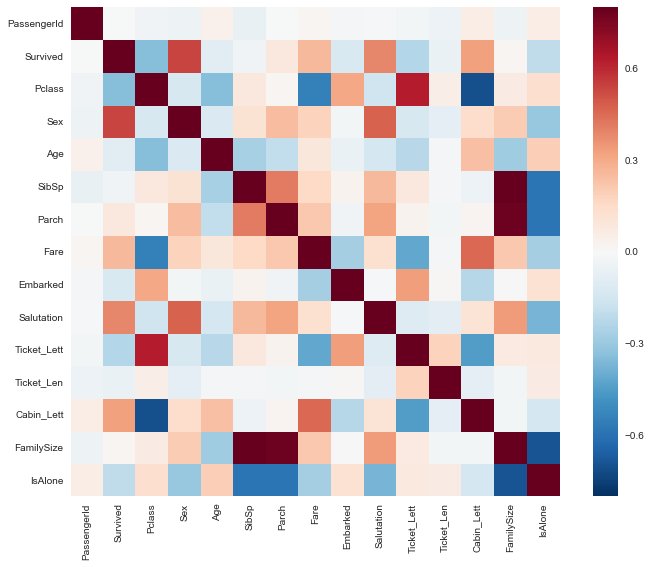

In [615]:

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [616]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
Salutation     418 non-null float64
Ticket_Lett    418 non-null int64
Ticket_Len     418 non-null int64
Cabin_Lett     418 non-null int64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
dtypes: float64(3), int64(11)
memory usage: 45.8 KB


In [617]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null float64
Salutation     891 non-null float64
Ticket_Lett    891 non-null int64
Ticket_Len     891 non-null int64
Cabin_Lett     891 non-null int64
FamilySize     891 non-null int64
IsAlone        891 non-null int64
dtypes: float64(4), int64(11)
memory usage: 104.5 KB


In [620]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

random_forest=RandomForestClassifier()
random_forest.fit(xs, y)
Y_pred = random_forest.predict(xs_test)


In [621]:
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
        writer.writerow([pid, survived])